In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [2]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [3]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]
len(df)

201

In [4]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [6]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  2.735906130222005
RMSE:  1.6540574748847168
MAE:  1.249584093130343
ESV:  0.518537618315993


In [8]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)

In [9]:
type(y)

numpy.ndarray

In [10]:
type(predictions)

numpy.ndarray

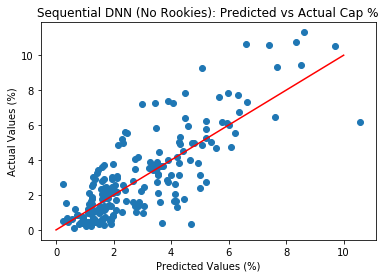

In [11]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)
plt.scatter(predictions,y)

plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title('Sequential DNN (No Rookies): Predicted vs Actual Cap %')
plt.plot(np.linspace(0,10,100),np.linspace(0,10,100), 'r-')

In [12]:
loaded_model.summary()

Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2025 (Dense)           (None, 18)                342       
_________________________________________________________________
dense_2026 (Dense)           (None, 40)                760       
_________________________________________________________________
dense_2027 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2028 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2029 (Dense)           (None, 1)                 41        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


In [13]:
import visualkeras

visualkeras.layered_view(loaded_model)

In [14]:
from keras_sequential_ascii import keras2ascii
keras2ascii(loaded_model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          18
               Dense   XXXXX -------------------       342     7.7%
                relu   #####          18
               Dense   XXXXX -------------------       760    17.2%
                relu   #####          40
               Dense   XXXXX -------------------      1640    37.1%
                relu   #####          40
               Dense   XXXXX -------------------      1640    37.1%
                relu   #####          40
               Dense   XXXXX -------------------        41     0.9%
                       #####           1


In [15]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])

In [45]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
real_y = rbs['2021capperc'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
rbs= rbs.drop('2021capperc',axis=1)

In [46]:
rbs

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,27,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1
1,27,73,239,955,10,69,15,13,31,25,137,0,5,18,3,30,19,25
2,26,257,144,723,6,36,16,6,13,9,129,0,4,34,1,8,1,5
3,26,205,169,721,6,59,13,11,43,35,215,0,10,18,2,32,32,28
4,27,249,141,681,5,29,12,12,46,37,287,4,14,29,1,10,15,17
5,26,134,119,505,2,25,14,3,35,31,236,1,11,29,0,5,3,1
6,27,257,118,502,1,55,11,8,14,7,28,0,1,11,0,28,12,32
7,26,10,195,678,9,35,15,15,35,25,164,0,7,26,2,26,29,16
8,38,65,187,653,2,17,15,14,19,16,89,0,3,9,1,16,30,10
9,36,7,165,604,7,38,16,10,18,12,101,0,4,23,0,20,24,18


In [47]:
names

array(['Aaron Jones', 'Kenyan Drake', 'Gus Edwards', 'James Conner',
       'Chris Carson', 'Jamaal Williams', 'Phillip Lindsay',
       'Todd Gurley II', 'Frank Gore', 'Adrian Peterson'], dtype=object)

In [48]:
real_y

array([2.369     , 1.592     , 1.796     , 0.9288    , 1.327     ,
       0.86252654, 1.63      ,        nan,        nan,        nan])

In [63]:
realpreds = []

for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    predi = loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
    realpreds.append(predi[0][0])
    print("PRED:",predi[0][0])
    print('REAL: ',real_y[i])

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
PRED: 0.89591235
REAL:  2.369
Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
PRED: 4.384539
REAL:  1.5919999999999999
Gus Edwards
[ 26 257 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
PRED: 0.40664816
REAL:  1.796
James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
PRED: 2.0447888
REAL:  0.9288
Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
PRED: 0.71965975
REAL:  1.327
Jamaal Williams
[ 26 134 119 505   2  25  14   3  35  31 236   1  11  29   0   5   3   1]
PRED: 0.7627789
REAL:  0.8625265390000001
Phillip Lindsay
[ 27 257 118 502   1  55  11   8  14   7  28   0   1  11   0  28  12  32]
PRED: 0.43448913
REAL:  1.63
Todd Gurley II
[ 26  10 195 678   9  35  15  15  35  25 164   0   7  26   2  26  29  16]
PRED: 5.46982
REAL:  nan
Frank Gore
[ 38  65 18

In [21]:
realpreds

[1.845775, 4.848217, 1.1705719, 3.0994954, 1.5447459, 1.2456422, 1.0253081]

In [22]:
real_y

array([2.369     , 1.592     , 1.796     , 0.9288    , 1.327     ,
       0.86252654, 1.63      ])

MAE: 1.3456728363735153
MSE: 3.149127825844518
RMSE: 1.7745782106868433
ESV:  0.4712326416436068


C:\Users\cmcin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\cmcin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

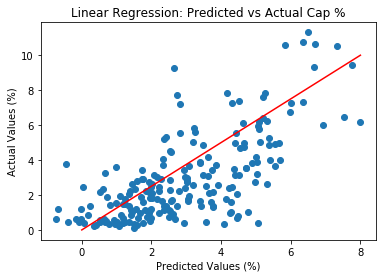

In [23]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
X_scl = scaler.fit_transform(X)
predictions = lm.predict(X_scl)
plt.scatter(predictions,y)
plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title("Linear Regression: Predicted vs Actual Cap %")
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print("ESV: ", explained_variance_score(y, predictions))
plt.plot(np.linspace(0,8,100),np.linspace(0,10,100), 'r-')




In [50]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
loaded_model.summary()

Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2025 (Dense)           (None, 18)                342       
_________________________________________________________________
dense_2026 (Dense)           (None, 40)                760       
_________________________________________________________________
dense_2027 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2028 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2029 (Dense)           (None, 1)                 41        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


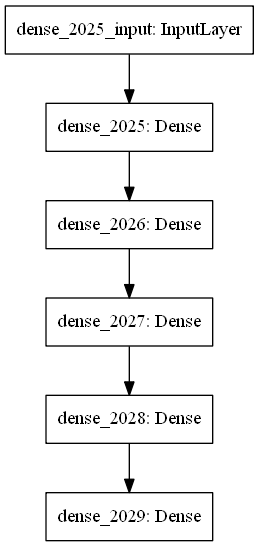

In [69]:
tf.keras.utils.plot_model(loaded_model)

In [73]:
for lay in loaded_model.layers:
    print(lay.name)
    print(lay.get_weights())

dense_2025
[array([[-0.13193706,  0.151117  , -0.11480409, -0.09083253,  0.00563815,
        -0.21138074,  0.1011359 , -0.0709602 ,  0.15257116,  0.31742343,
         0.20645979,  0.23598117,  0.35230267,  0.06217442,  0.19906771,
        -0.0665344 ,  0.33319724,  0.08765634],
       [-0.3624815 , -0.08170325, -0.3607301 , -0.10495488,  0.22480828,
         0.15538728,  0.24568965,  0.31645122,  0.383378  , -0.1536846 ,
        -0.49787217,  0.4320713 ,  0.39221978,  0.22865985,  0.30687985,
         0.06428161, -0.14218305, -0.43691954],
       [ 0.11681096,  0.1182161 ,  0.3423134 ,  0.01667211, -0.12695833,
         0.36157668, -0.0852573 , -0.08052903,  0.30729914,  0.26272753,
         0.4514761 ,  0.22782508,  0.43086016,  0.3092575 , -0.34418595,
        -0.16340525, -0.26771402,  0.41040632],
       [-0.3340885 ,  0.2324833 ,  0.09736116,  0.01332089,  0.08584394,
         0.16254628, -0.055632  , -0.454522  , -0.32413793, -0.30417514,
         0.36911032,  0.08662154,  0.0919

In [78]:
loaded_model.trainable_weights

[<tf.Variable 'dense_2025/kernel:0' shape=(18, 18) dtype=float32, numpy=
 array([[-0.13193706,  0.151117  , -0.11480409, -0.09083253,  0.00563815,
         -0.21138074,  0.1011359 , -0.0709602 ,  0.15257116,  0.31742343,
          0.20645979,  0.23598117,  0.35230267,  0.06217442,  0.19906771,
         -0.0665344 ,  0.33319724,  0.08765634],
        [-0.3624815 , -0.08170325, -0.3607301 , -0.10495488,  0.22480828,
          0.15538728,  0.24568965,  0.31645122,  0.383378  , -0.1536846 ,
         -0.49787217,  0.4320713 ,  0.39221978,  0.22865985,  0.30687985,
          0.06428161, -0.14218305, -0.43691954],
        [ 0.11681096,  0.1182161 ,  0.3423134 ,  0.01667211, -0.12695833,
          0.36157668, -0.0852573 , -0.08052903,  0.30729914,  0.26272753,
          0.4514761 ,  0.22782508,  0.43086016,  0.3092575 , -0.34418595,
         -0.16340525, -0.26771402,  0.41040632],
        [-0.3340885 ,  0.2324833 ,  0.09736116,  0.01332089,  0.08584394,
          0.16254628, -0.055632  , -0.45

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

In [25]:
loaded_model.layers

In [26]:
# rbs =pd.read_csv("../../data/rbs_to_predict.csv")
# names = rbs['playername'].values
# real_y = rbs['2021capperc'].values
# rbs = rbs.drop('tm',axis=1)
# rbs = rbs.drop('playername',axis=1)
# rbs= rbs.drop('2021capperc',axis=1)

# real_compare= pd.DataFrame([],columns=['name', 'predicted','real'])
# realpreds = []

# for i in range(len(names)):
#     print(names[i])
#     print(rbs.iloc[i].to_numpy())
#     predi = loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
#     realpreds.append(predi[0][0])
#     print(predi[0][0])
#     print(real_y[i])
#     listi = [['',0,0]]
#     listi[0][0] = names[i]
#     listi[0][1] = predi[0][0]
#     listi[0][2] = real_y[i].round(decimals=3)
#     listi = np.array(listi)
#     print(listi)
#     dfi = pd.DataFrame(listi,columns=['name', 'predicted','real'])
#     real_compare = real_compare.append(dfi)
    
#     print()

# real_compare

In [27]:
# rbs =pd.read_csv("../../data/rbs_to_predict.csv")
# names = rbs['playername'].values
# real_y = rbs['2021capperc'].values
# rbs = rbs.drop('tm',axis=1)
# rbs = rbs.drop('playername',axis=1)
# rbs= rbs.drop('2021capperc',axis=1)

# real_compare= pd.DataFrame([],columns=['name', 'predicted','real'])
# realpreds = []

# for i in range(len(names)):
#     print(names[i])
#     print(rbs.iloc[i].to_numpy())
#     predi = lm.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
#     realpreds.append(predi[0])
#     print(predi[0])
#     print(real_y[i])
#     listi = [['',0,0]]
#     listi[0][0] = names[i]
#     listi[0][1] = predi[0]
#     listi[0][2] = real_y[i].round(decimals=3)
#     listi = np.array(listi)
#     print(listi)
#     dfi = pd.DataFrame(listi,columns=['name', 'predicted','real'])
#     real_compare = real_compare.append(dfi)
    
#     print()

# real_compare

In [28]:

import seaborn as sns
import pandas as pd


In [29]:
df

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,Percenthit (%),g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
5,34,7,211,898,5,32,0.945802,15,15,23,17,142,0,7,22,3,18,15,17
6,33,7,251,1042,7,90,0.355530,16,16,26,20,208,1,9,52,3,26,23,28
7,31,7,37,72,0,13,7.728473,3,3,6,3,8,0,0,7,1,30,32,26
8,30,7,327,1485,11,80,10.748185,16,16,36,30,222,0,9,49,7,10,4,12
9,29,7,21,75,0,17,9.268023,1,1,3,2,18,0,1,9,0,13,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,30,257,133,548,4,30,0.540993,16,1,26,22,200,1,11,50,0,1,9,2
560,29,257,96,375,4,26,0.216154,8,3,13,12,129,0,7,27,0,13,18,14
562,25,10,223,857,12,25,4.888417,15,15,49,31,207,2,8,23,3,19,26,26
575,32,257,11,23,0,6,1.195122,16,7,20,11,47,1,3,12,1,32,32,32


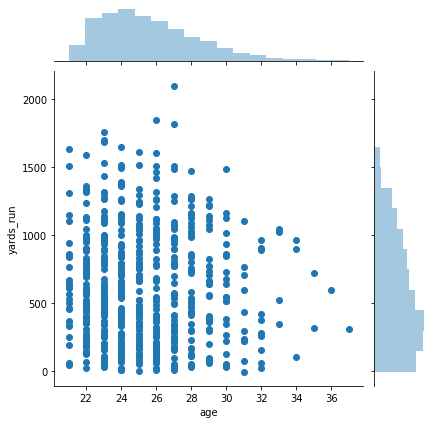

In [84]:
rbs= pd.read_csv("../../data/processed/oline_merge.csv")
rbs = rbs.drop('Unnamed: 0',axis=1)
rbs = rbs.drop('Unnamed: 0.1',axis=1)
rbs = rbs.drop('catchpercent',axis=1)
rbs = rbs.drop('team',axis=1)
rbs = rbs.drop('playername',axis=1)
# sns.jointplot(x='age',y='yards_run',data=rbs)

In [ ]:
sns.jointplot(x='yards_rec',y='yards_run',data=rbs)

In [ ]:
rbs.dtypes

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(x='team',y='Percenthit (%)',data=rbs,palette='Set2')

Text(0.5, 1.0, 'Salary cap % vs Time')

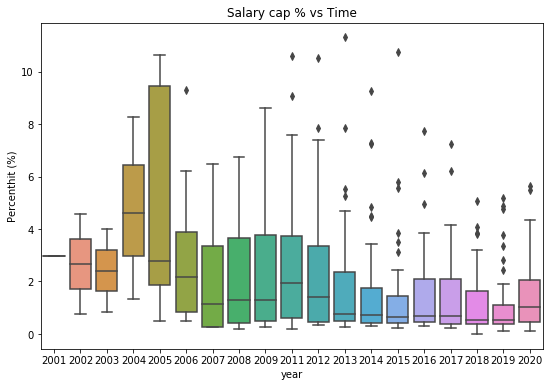

In [34]:
plt.figure(figsize=(9,6))
sns.boxplot(x='year',y='Percenthit (%)',data=rbs)
plt.title("Salary cap % vs Time")

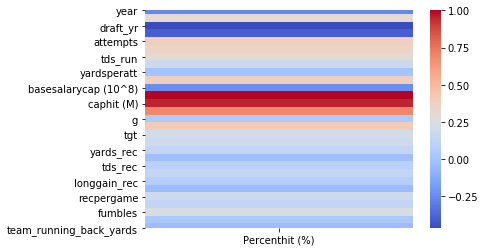

In [35]:
sns.heatmap(rbs.corr()[['Percenthit (%)']],cmap='coolwarm')

In [36]:
rbs = rbs.drop('basesalarycap (10^8)',axis=1)
rbs = rbs.drop('cashspent (M)',axis=1)
rbs = rbs.drop('caphit (M)',axis=1)

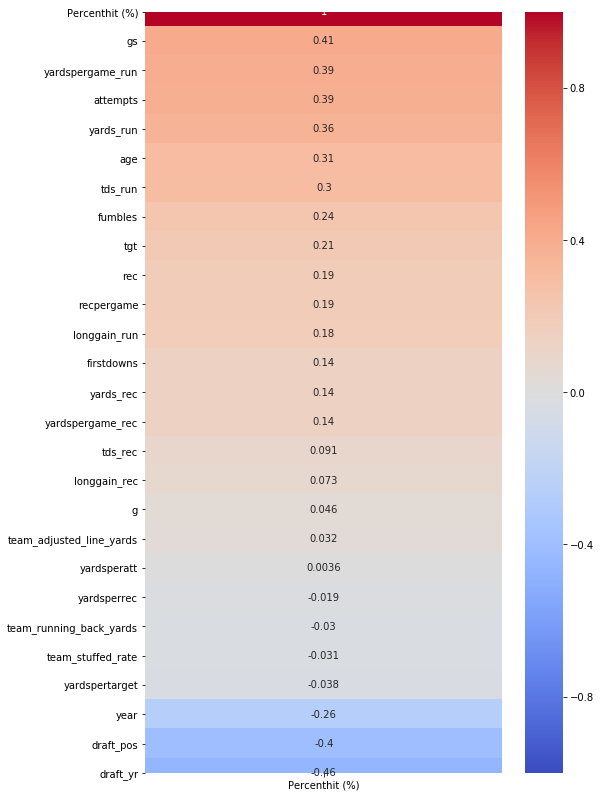

In [37]:
plt.figure(figsize=(8, 14))
heatmap = sns.heatmap(rbs.corr()[['Percenthit (%)']].sort_values(
    by='Percenthit (%)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [38]:
import tensorboard
tensorboard.__version__

'2.4.0'

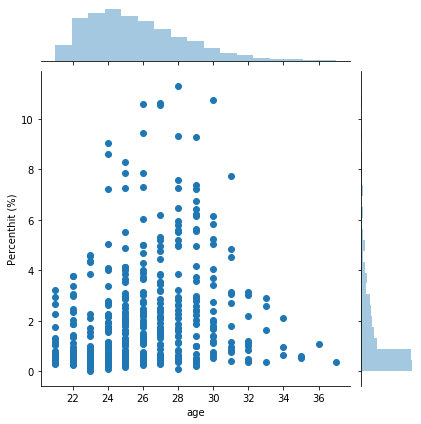

In [88]:
sns.jointplot(y='Percenthit (%)',x='age',data=rbs)

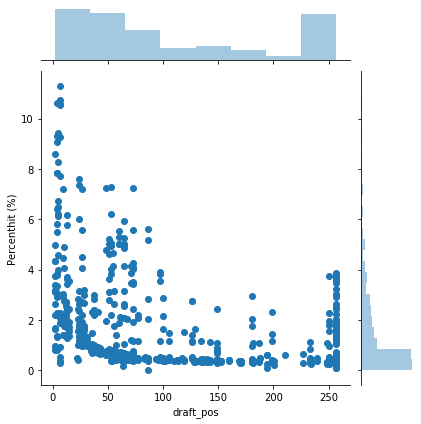

In [89]:
sns.jointplot(y='Percenthit (%)',x='draft_pos',data=rbs)